# Syntactic embeddings of ontologies

Syntactic embeddings embedding uses the syntax of axioms to generate sentences out of them. mOWL provides methods to generate text sentences from the axioms and/or the annotations in the ontology. The syntax chosen to generate the sentences is [Manchester Syntax](https://www.w3.org/2007/OWL/draft/ED-owl2-manchester-syntax-20081128/).

In [14]:
import mowl
mowl.init_jvm("10g")

We import our `Family Ontology` and the method `extract_axiom_corpus`, which extracts the axioms from the ontology and generates sentences in *Manchester Syntax*.

In [15]:
from mowl.corpus import extract_axiom_corpus
from mowl.datasets import PathDataset
dataset = PathDataset("family.owl")
corpus = extract_axiom_corpus(dataset.ontology)

INFO:root:Generating axioms corpus


Let's see the corpus generated:

In [16]:
for s in corpus:
    print(s)

http://Melissa Type http://Female
http://Jane Type http://Mother
http://Jane http://hasChild http://Melissa
http://Female and http://Parent SubClassOf http://Mother
http://Parent SubClassOf http://hasChild some http://Person
http://John http://hasChild http://Melissa
http://John Type http://Father
Individual: http://Robert
Class: http://Person
http://Person EquivalentTo http://Female or http://Male
Class: http://Parent
Individual: http://Jane
Class: http://Male
http://Male and http://Parent SubClassOf http://Father
http://Female SubClassOf http://Person
http://Father SubClassOf http://Male
Individual: http://Melissa
Class: http://Mother
http://Jane http://hasChild http://Robert
http://Male SubClassOf http://Person
Class: http://Father
ObjectProperty: http://hasChild
http://Robert Type http://Male
http://Parent SubClassOf http://Person
Individual: http://John
http://Female EquivalentTo not http://Male
http://Mother SubClassOf http://Female
http://John http://hasChild http://Robert
Class

Now it is possible to input this corpus in a model like Word2Vec, which will generate numerical representations for our vocabulary. We will use the `gensim` library to do this.

In [17]:
from gensim.models import Word2Vec

sentences = [s.split(" ") for s in corpus]
w2v = Word2Vec(sentences, epochs=100, vector_size = 100, min_count = 0)

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 21 word types from a corpus of 85 raw words and 29 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=0 retains 21 unique words (100.00% of original 21, drops 0)', 'datetime': '2023-01-14T23:35:03.452293', 'gensim': '4.3.0', 'python': '3.8.0 (default, Nov  6 2019, 21:49:08) \n[GCC 7.3.0]', 'platform': 'Linux-5.15.0-56-generic-x86_64-with-glibc2.10', 'event': 'prepare_vocab'}
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=0 leaves 85 word corpus (100.00% of original 85, drops 0)', 'datetime': '2023-01-14T23:35:03.452823', 'gensim': '4.3.0', 'python': '3.8.0 (default, Nov  6 2019, 21:49:08) \n[GCC 7.3.0]', 'platform': 'Linux-5.15.0-56-generic-x86_64-with-glibc2.10', 'event': 'prepare

INFO:gensim.models.word2vec:EPOCH 50: training on 85 raw words (13 effective words) took 0.0s, 22326 effective words/s
INFO:gensim.models.word2vec:EPOCH 51: training on 85 raw words (12 effective words) took 0.0s, 16057 effective words/s
INFO:gensim.models.word2vec:EPOCH 52: training on 85 raw words (17 effective words) took 0.0s, 27411 effective words/s
INFO:gensim.models.word2vec:EPOCH 53: training on 85 raw words (15 effective words) took 0.0s, 116154 effective words/s
INFO:gensim.models.word2vec:EPOCH 54: training on 85 raw words (16 effective words) took 0.0s, 24033 effective words/s
INFO:gensim.models.word2vec:EPOCH 55: training on 85 raw words (19 effective words) took 0.0s, 24262 effective words/s
INFO:gensim.models.word2vec:EPOCH 56: training on 85 raw words (9 effective words) took 0.0s, 11415 effective words/s
INFO:gensim.models.word2vec:EPOCH 57: training on 85 raw words (21 effective words) took 0.0s, 32736 effective words/s
INFO:gensim.models.word2vec:EPOCH 58: training o

Finally, we can provide a visual representation of the entities. We will use a modified version of TSNE, which is implemented in mOWL:

In [18]:
from tsne import TSNE

vectors = w2v.wv
vocab_dict = vectors.key_to_index
name_to_label = {c: c.split("/")[-1] for c in vocab_dict if str(c).startswith("http://")}
name_to_emb = {c: vectors[[c]][0] for c in name_to_label}

tsne = TSNE(name_to_emb, name_to_label)
tsne.generate_points(500, workers=4)

INFO:root:Found 11 embedding vectors. Processing only 11.


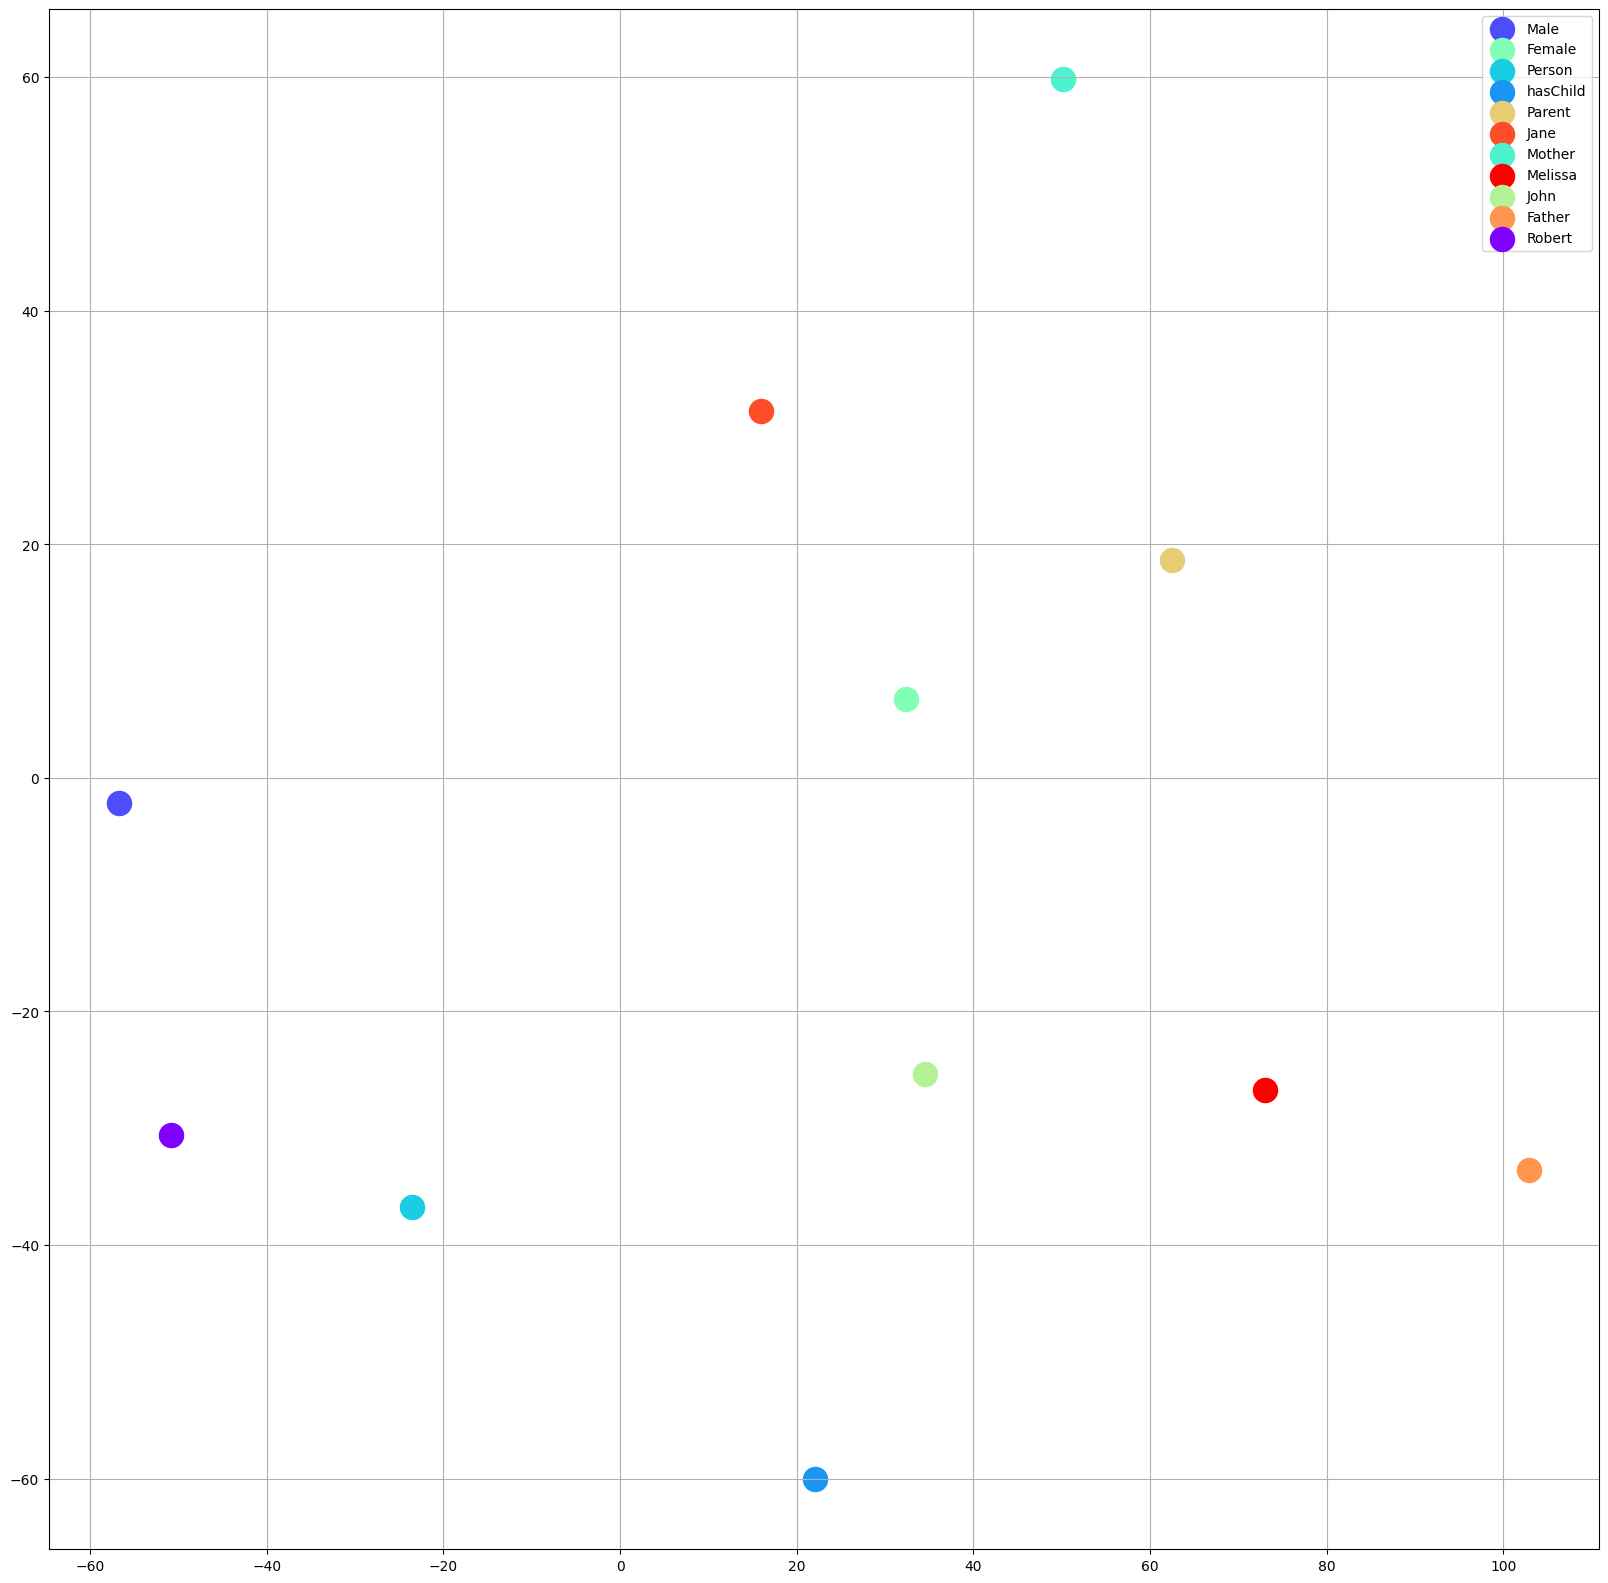

In [19]:
tsne.show(thickness=300)